In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import pickle
import multiprocessing
import math
import json
import pprint
import csv
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

In [24]:
df_partitionData = pd.read_csv('.temp/partition_datas_04_probFixed.csv', names=['w2w', 't2t', 'scng', 'lmvblm', 'dw2w', 'dt2t', 'dscng', 'dlmvblm'])

In [28]:
df_partitionData.w2w + df_partitionData.t2t + df_partitionData.scng + df_partitionData.lmvblm

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
5       1.000000
6       1.000000
7       1.000000
8       1.000000
9       1.000000
10      1.000000
11      1.000000
12      1.000000
13      1.000000
14      1.000000
15      1.000000
16      1.000000
17      1.000000
18      1.000000
19      1.000000
20      1.000000
21      1.000000
22      1.000000
23      1.000000
24      1.000000
25      1.000000
26      1.000000
27      1.000000
28      1.000000
29      1.000000
          ...   
4005    1.000000
4006    1.000001
4007    1.000001
4008    1.000000
4009    1.000000
4010    1.000000
4011    1.000000
4012    1.000000
4013    1.000000
4014    1.000001
4015    1.000000
4016    0.999999
4017    1.000000
4018    1.000000
4019    1.000000
4020    1.000000
4021    1.000000
4022    0.999999
4023    1.000001
4024    1.000000
4025    1.000001
4026    1.000000
4027    1.000001
4028    0.999999
4029    1.000000
4030    1.000000
4031    1.000000
4032    1.0000

In [14]:
print(df_partitionData.shape[0])
df_partitionData.head()

2316


w2w       t2t      scng  NA      dw2w      dt2t     dscng
0  0.333333  0.333333  0.333333   0 -0.002835 -0.005389 -0.003710
1  0.333050  0.332794  0.332962   0 -0.011905 -0.003944  0.009094
2  0.331859  0.332400  0.333872   0 -0.013453  0.001351 -0.015137
3  0.330514  0.332535  0.332358   0 -0.024763  0.007665 -0.015179
4  0.328038  0.333302  0.330840   0 -0.014623 -0.014594 -0.018271

In [22]:
df_partitionData.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4257, 4258, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266],
           dtype='int64', length=4267)

In [15]:
nis = np.array(np.where(np.isnan(df_partitionData['dw2w'])))[0]
print(nis)
nis = nis - 1
print(nis)
df_breaks = df_partitionData.loc[nis]

[ 260  516  764 1043 1205 1418 1551 1826 2055 2258]
[ 259  515  763 1042 1204 1417 1550 1825 2054 2257]


In [16]:
df_breaks

w2w       t2t      scng  NA      dw2w      dt2t     dscng
259   0.149025  0.225253  0.050257   0 -0.127962 -0.080103 -0.047963
515   0.185773  0.261263  0.056004   0  0.015283 -0.055813 -0.290457
763   0.158970  0.238436  0.053410   0 -0.035539  0.003350 -0.039424
1042  0.149484  0.236210  0.050432   0  0.001065 -0.000142 -0.005214
1204  0.181983  0.280404  0.034344   0 -0.006422 -0.002797  0.005239
1417  0.122846  0.271139  0.053201   0  0.006422  0.000000 -0.043163
1550  0.167803  0.301815  0.036290   0 -0.007957 -0.000297 -0.040690
1825  0.157624  0.201576  0.048184   0  0.000452 -0.001408 -0.000144
2054  0.109959  0.199788  0.048182   0  0.001967 -0.001730 -0.006436
2257  0.084715  0.252006  0.042900   0 -0.003812 -0.000794  0.003665

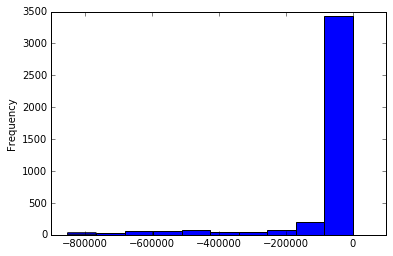

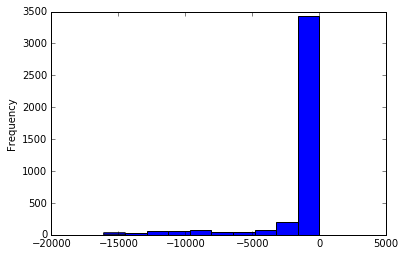

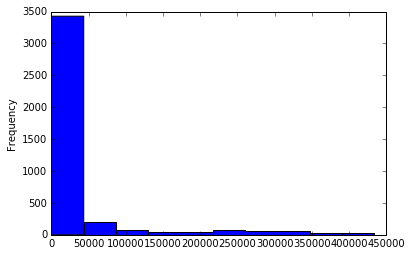

In [26]:
# IMPORTANT
df_partitionData['w2w'].plot.hist()
plt.show()
df_partitionData['t2t'].plot.hist()
plt.show()
df_partitionData['scng'].plot.hist()
plt.show()

In [41]:
df_partitionData = df_partitionData.query('scng <= 1 and t2t <= 1 and w2w <= 1 and scng >= -1 and t2t >= -1 and w2w >= -1')

In [42]:
df_partitionData['z'] = df_partitionData['1'] + df_partitionData['2']

W2W weights


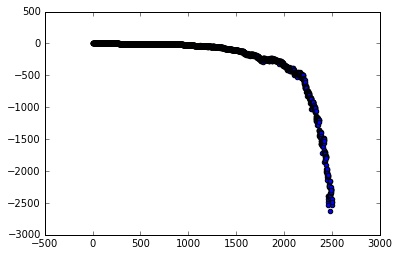

T2T weights


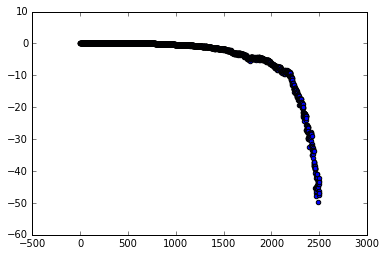

SameCNG weights


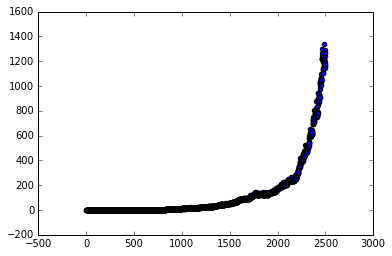

LMVBLM weights


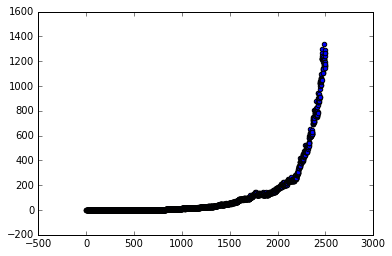

In [29]:
df_partitionData2 = df_partitionData.loc[0:2500]
print('W2W weights')
plt.scatter(df_partitionData2.index, df_partitionData2['w2w'])
plt.show()

print('T2T weights')
plt.scatter(df_partitionData2.index, df_partitionData2['t2t'])
plt.show()

print('SameCNG weights')
plt.scatter(df_partitionData2.index, df_partitionData2['scng'])
plt.show()

print('LMVBLM weights')
plt.scatter(df_partitionData2.index, df_partitionData2['lmvblm'])
plt.show()

In [25]:
df_partitionData.loc[df_partitionData['dw2w'] >= 0, 'dw2w'] += 0.01
df_partitionData.loc[df_partitionData['dw2w'] < 0, 'dw2w'] -= 0.01
plt.scatter(df_partitionData['w2w'], df_partitionData['dw2w'])
plt.show()

df_partitionData.loc[df_partitionData['dt2t'] >= 0, 'dt2t'] += 0.01
df_partitionData.loc[df_partitionData['dt2t'] < 0, 'dt2t'] -= 0.01
plt.scatter(df_partitionData['t2t'], df_partitionData['dt2t'])
plt.show()

df_partitionData.loc[df_partitionData['dscng'] >= 0, 'dscng'] += 0.01
df_partitionData.loc[df_partitionData['dscng'] < 0, 'dscng'] -= 0.01
plt.scatter(df_partitionData['scng'], df_partitionData['dscng'])
plt.show()

In [35]:

df_partitionData['dw2w'].plot.hist(bins = 50)
plt.show()

In [26]:
df_partitionData['dt2t'].plot.hist(bins = 50)
plt.show()

In [25]:
df_partitionData['dscng'].plot.hist(bins = 50)
plt.show()

In [20]:
# di = df_partitionData['dcomb'] > 0
print(np.median(df_partitionData['w2w']))
print(np.median(df_partitionData['t2t']))
print(np.median(df_partitionData['scng']))
print('-'*50)
# di = df_partitionData['dcomb'] < 0
# print(np.median(df_partitionData.loc[di, 'w2w']))
# print(np.median(df_partitionData.loc[di, 't2t']))
# print(np.median(df_partitionData.loc[di, 'scng']))



0.239805093952
0.292113212683
0.188738249742
--------------------------------------------------


In [7]:
df_logR_train = pd.read_csv('logReg_train_full.csv')
df_logR_train.rename(columns={'DSCLemma':'DCSLemma'}, inplace=True)

In [8]:
df_logR_train.DCSLemma = df_logR_train.DCSLemma.astype(int)
df_logR_train.head()

w2w       t2t      scng  DCSLemma
0  0.083628  0.017005  0.061294         0
1  0.027827  0.024054  0.020912         1
2  0.027827  0.021297  0.020912         1
3  0.027842  0.017005  0.020930         1
4  0.014351  0.017005  0.008584         1

In [5]:
df_logR_train_pos = df_logR_train[df_logR_train.DCSLemma == True]
df_logR_train_neg = df_logR_train[df_logR_train.DCSLemma == False]

In [6]:
print(df_logR_train_neg.shape)
print(df_logR_train_pos.shape)
df_logR_train_neg2 = df_logR_train_neg.loc[0::2]
frames = [df_logR_train_pos, df_logR_train_neg2]
df_logR_train_small = pd.concat(frames)
print(df_logR_train_small.shape)

(170264, 4)
(93232, 4)
(178364, 4)


In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_logR_train_pos.w2w, df_logR_train_pos.t2t, df_logR_train_pos.scng, c='r', marker='o')
ax.scatter(df_logR_train_neg.w2w, df_logR_train_neg.t2t, df_logR_train_neg.scng, c='b', marker='^')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold

In [10]:
lr = LogisticRegression(solver='lbfgs', fit_intercept=False) # lbfgs, No Bias
# lr.fit()
kf = KFold(df_logR_train_small.shape[0],4)

In [17]:
df_logR_train_small = df_logR_train_small.iloc[np.random.permutation(len(df_logR_train_small))]
df_logR_train_small = df_logR_train_small.reset_index(drop=True)
df_logR_train_small

w2w       t2t      scng  DCSLemma
0       1.449240e-03  0.002752  0.001984         0
1       0.000000e+00  0.000000  0.000000         0
2       3.023357e-03  0.004723  0.004042         0
3       0.000000e+00  0.000000  0.000000         0
4       7.627570e-03  0.023363  0.014294         1
5       0.000000e+00  0.000000  0.000000         0
6       3.297532e-03  0.003956  0.003920         1
7       0.000000e+00  0.000000  0.000000         0
8       0.000000e+00  0.000000  0.000000         1
9       1.437285e-02  0.014105  0.016851         0
10      2.312598e-03  0.001439  0.002722         1
11      2.653046e-03  0.006627  0.008237         0
12      5.044881e-03  0.006276  0.005978         1
13      0.000000e+00  0.000000  0.000000         1
14      1.783448e-02  0.008527  0.013353         1
15      7.649043e-03  0.011520  0.008745         1
16      2.009740e-07  0.029370  0.018043         0
17      0.000000e+00  0.000000  0.000000         1
18      9.108749e-03  0.009402  0.010470         1
19      0.000000e+00  0.000000  0.000000         1
20      5.547242e-04  0.000998  0.000654         1
21      3.709129e-03  0.003027  0.005170         0
22      5.665329e-03  0.006753  0.008698         1
23      4.325951e-03  0.007310  0.008355         1
24      1.292505e-02  0.008549  0.008807         1
25      3.020793e-03  0.004870  0.005216         0
26      0.000000e+00  0.000000  0.000000         0
27      0.000000e+00  0.000000  0.000000         0
28      7.294103e-03  0.010010  0.008210         1
29      5.496821e-03  0.006371  0.006948         0
...              ...       ...       ...       ...
966634  4.064318e-03  0.005689  0.006093         0
966635  3.703337e-03  0.002594  0.005705         1
966636  4.192842e-03  0.006096  0.008115         0
966637  7.154399e-03  0.009373  0.013441         0
966638  2.381911e-02  0.027160  0.028171         0
966639  0.000000e+00  0.000000  0.000000         1
966640  0.000000e+00  0.000000  0.000000         1
966641  2.952627e-02  0.023229  0.033451         1
966642  2.358730e-03  0.005331  0.006259         0
966643  6.709095e-03  0.003799  0.005621         0
966644  0.000000e+00  0.000000  0.000000         0
966645  0.000000e+00  0.000000  0.000000         0
966646  9.467309e-04  0.000838  0.001633         0
966647  0.000000e+00  0.000000  0.000000         0
966648  1.313453e-02  0.006527  0.011067         0
966649  1.918459e-03  0.002015  0.002312         0
966650  1.335142e-02  0.025879  0.019160         1
966651  0.000000e+00  0.000000  0.000000         0
966652  5.274015e-03  0.003555  0.007031         1
966653  0.000000e+00  0.000000  0.000000         0
966654  1.335870e-02  0.007540  0.013674         1
966655  7.431764e-03  0.009183  0.011095         1
966656  2.681355e-03  0.002914  0.003816         0
966657  3.253763e-03  0.001668  0.004023         0
966658  0.000000e+00  0.000000  0.000000         1
966659  2.008558e-03  0.011590  0.010907         1
966660  1.274063e-02  0.010340  0.015781         1
966661  1.421734e-02  0.004051  0.006067         0
966662  5.506600e-03  0.008061  0.009518         1
966663  3.708356e-03  0.007155  0.006405         1

[966664 rows x 4 columns]

In [11]:
df_logR_train_small = df_logR_train
for train, test in kf:
    print(np.sum(df_logR_train_small.loc[train, 'DCSLemma']), 'pos training example of', df_logR_train_small.loc[train].shape[0])
    lr.fit(df_logR_train_small.loc[train, ['w2w', 't2t', 'scng']], df_logR_train_small.loc[train, 'DCSLemma'])
    print(np.sum(df_logR_train_small.loc[test, 'DCSLemma'] == lr.predict(df_logR_train_small.loc[test, ['w2w', 't2t', 'scng']]))/len(test))
    print(lr.coef_)

47353 pos training example of 133773
0.635666390079
[[  5.84036912 -22.64457934   7.67148922]]
48964 pos training example of 133773
0.661119956942
[[  5.35843014 -21.56861248   8.54537841]]
47220 pos training example of 133773
0.637752012738
[[  5.41205961 -21.52234669   6.8416937 ]]
48172 pos training example of 133773
0.653270839407
[[  4.45797064 -22.00971719   8.4088896 ]]
